## Problema I


Dada la siguiente red neuronal entrenada:

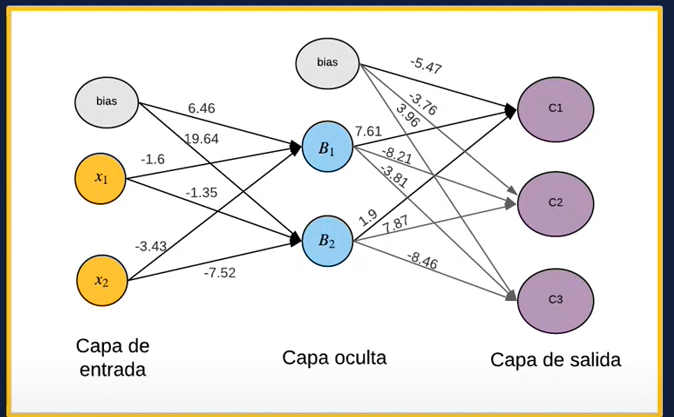

In [1]:
from IPython.display import Image
Image("7.png")

Se pide hallar:
    
1. Hallar las predicciones del modelo para el siguiente conjunto de test.

2. Evaluar el rendimiento del clasificador en dicho conjunto.

In [2]:
import numpy as np
import pandas as pd

b = np.matrix('1.5 0.2 1;1.4 0.3 1; 1.6 0.4 1; 1.1 0.1 2; 4.3 1.3 1; 3 1.1 2; 4.9 2 2; 6.1 1.9 2; 4.4 1.2 3; 5.9 2.1 1; 5.6 1.4 3; 5 1.9 3')
df_test = pd.DataFrame(b, columns = ['x1','x2','clase',])
df_test

,x1,x2,clase
0,1.5,0.2,1.0
1,1.4,0.3,1.0
2,1.6,0.4,1.0
3,1.1,0.1,2.0
4,4.3,1.3,1.0
5,3.0,1.1,2.0
6,4.9,2.0,2.0
7,6.1,1.9,2.0
8,4.4,1.2,3.0
9,5.9,2.1,1.0


In [3]:
# Aqui es donde vy a almacenar mis valores
tabla_general = pd.DataFrame()

# Copia las columna que necesito al nuevo data frama
tabla_general['x1'] = df_test['x1']
tabla_general['x2'] = df_test['x2']


Primero averiguo la parte de **Activacion** de la neurona Z

z1 = w01 + w11*x1 + w21*x2

z1 = 6.46 + (-1.6)*x1 + (-3.43)* x2

In [4]:
z1 = []

for indice_fila, fila in df_test.iterrows():
    #print(indice_fila)
    #print(fila['x1'])
    
    a = 6.46 + (-1.6)*fila['x1'] + (-3.43)*fila['x2']
    z1.append(a)

print('Esto es Z1 para el conjunto de X:')
print('')
for i in z1:
    print(i)

Esto es Z1 para el conjunto de X:

3.3739999999999997
3.1910000000000007
2.5279999999999996
4.356999999999999
-4.8790000000000004
-2.1130000000000013
-8.240000000000002
-9.817
-4.696000000000001
-10.183000000000002
-7.301999999999999
-8.057


Hago lo mismo para b2

Primero averiguo la parte de **Activacion** de la neurona Z

z1 = w01 + w11*x1 + w21*x2

z1 = 19.64 + (-1.35)*x1 + (-7.52)* x2

In [5]:
z2 = []

for indice_fila, fila in df_test.iterrows():
    #print(indice_fila)
    #print(fila['x1'])
    
    a = 19.64 + (-1.35)*fila['x1'] + (-7.52)*fila['x2']
    z2.append(a)

print('Esto es Z2 para el conjunto de X:')
print('')
for i in z2:
    print(i)

Esto es Z2 para el conjunto de X:

16.111
15.494
14.472000000000001
17.403000000000002
4.059000000000001
7.318
-2.0150000000000006
-2.8829999999999973
4.676
-4.116999999999999
1.5520000000000032
-1.397999999999998


### Ahora si puedo calcular **B1 yB2**

Para ello aplpico la funcion SIGMOIDE

- B1 = 1/1+e**(z)
- B1 = 1/1+e**(z)

In [6]:
import math

def sigmoid(z):
  return 1 / (1 + math.exp(-z))


**Implemento la funcion de sigmoid para averiguar B1**

In [7]:
B1 = []

for i in z1:
    x = sigmoid(i)
    
    B1.append(x)

for i in B1:
    print(i)
    

0.9668820153733791
0.9604941830348245
0.926081561005822
0.9873454107187507
0.007547221131550485
0.10783969612210234
0.000263814632928312
5.4513917855398075e-05
0.009049097147857387
3.780618641712779e-05
0.0006737348231818151
0.0003167756302134308


**Implemento la funcion de sigmoid para averiguar B2**

In [8]:
B2 = []

for i in z2:
    x = sigmoid(i)
    
    B2.append(x)

for i in B2:
    print(i)

0.9999998992879217
0.9999998133443173
0.9999994813313094
0.9999999723322962
0.9830267874240276
0.9993369520634147
0.11763699212507704
0.05300036035416453
0.9907697862826821
0.016032104924362547
0.8252024062848797
0.19813367305456217


Asi va mi tabla:
    

In [9]:
# Agrego las columnas que he encontrado
tabla_general['b1'] = B1
tabla_general['b2'] = B2
tabla_general

,x1,x2,b1,b2
0,1.5,0.2,0.966882,1.000000
1,1.4,0.3,0.960494,1.000000
2,1.6,0.4,0.926082,0.999999
3,1.1,0.1,0.987345,1.000000
4,4.3,1.3,0.007547,0.983027
5,3.0,1.1,0.107840,0.999337
6,4.9,2.0,0.000264,0.117637
7,6.1,1.9,0.000055,0.053000
8,4.4,1.2,0.009049,0.990770
9,5.9,2.1,0.000038,0.016032


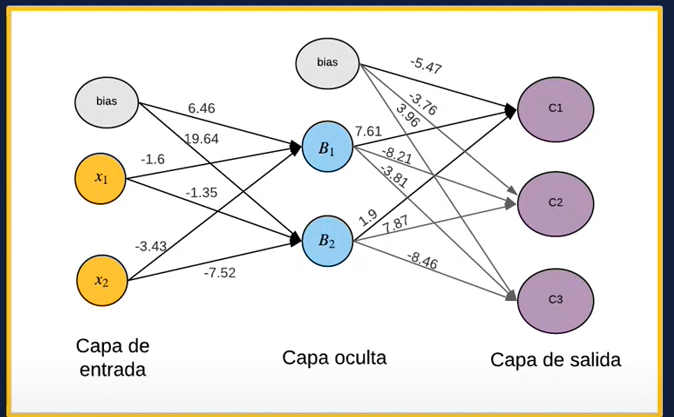

In [10]:
from IPython.display import Image
Image("7.png")

Hasta ahora he logrado calcular la informacion de las capas ocultas **B**

Ahora es necesario trabajar en la capa de salida **C**

### Aqui basicamente es volver a aplicar una **Sigmoide**


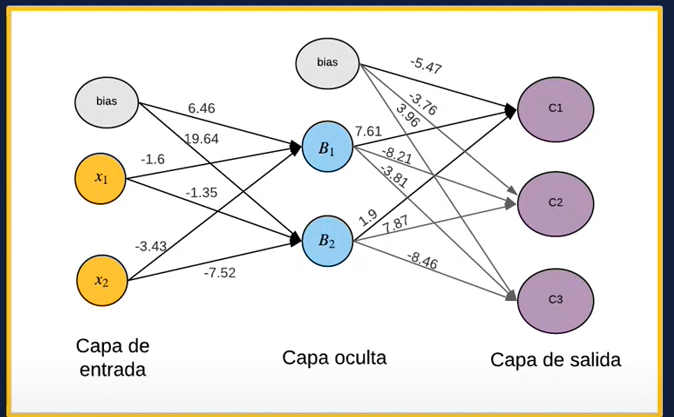

In [11]:
from IPython.display import Image
Image("7.png")

Primero averiguo la parte de **Activacion** de la neurona C

z(k) = w01 + w11*b1 + w21*b2

Como tenemos 3 neuronas en la capa de salida usamos la funcion sigmoide 3 veces

- z1 = -5.47 + (7.61)*b1 + (1.9)* b2

- z2 = -3.76 + (-8.21)*b1 + (7.87)* b2

- z3 = 3.96 + (-3.81)*b1 + (-8.46)* b2

In [12]:
activacion1 = []
activacion2 = []
activacion3 = []


for indice_fila, fila in tabla_general.iterrows():
    #print(indice_fila)
    #print(fila['x1'])
    
    a =  -5.47 + (7.61)*fila['b1'] + (1.9)*fila['b2']

    b = -3.76 + (-8.21)*fila['b1']+ (7.87)*fila['b2']

    c = 3.96 + (-3.81)*fila['b1']+ (-8.46)*fila['b2']
    
    
    activacion1.append(a)
    activacion2.append(b)
    activacion3.append(c)

Con la fase de activacion hecha aplico el agoritmo **Sigmoide**

In [13]:
C1 = []
C2 = []
C3 = []

for i in activacion1:
    x = sigmoid(i)  
    C1.append(x)
    
for i in activacion2:
    x = sigmoid(i)    
    C2.append(x)

for i in activacion3:
    x = sigmoid(i)    
    C3.append(x)

    

In [14]:
# Agrego las columnas que he encontrado
tabla_general['c1'] = C1
tabla_general['c2'] = C2
tabla_general['c3'] = C3
tabla_general

,x1,x2,b1,b2,c1,c2,c3
0,1.5,0.2,0.966882,1.000000,0.977860,0.021288,0.000279
1,1.4,0.3,0.960494,1.000000,0.976783,0.022408,0.000286
2,1.6,0.4,0.926082,0.999999,0.970040,0.029508,0.000326
3,1.1,0.1,0.987345,1.000000,0.980992,0.018055,0.000258
4,4.3,1.3,0.007547,0.983027,0.028064,0.980439,0.012308
5,3.0,1.1,0.107840,0.999337,0.060053,0.961559,0.007353
6,4.9,2.0,0.000264,0.117637,0.005249,0.055391,0.950911
7,6.1,1.9,0.000055,0.053000,0.004638,0.034114,0.971011
8,4.4,1.2,0.009049,0.990770,0.028786,0.981350,0.011471
9,5.9,2.1,0.000038,0.016032,0.004324,0.025727,0.978631


In [15]:
# Tambien hago otro dataframe para scar el max entre las tres clases predichas.
c = pd.DataFrame()

c['c1'] = tabla_general['c1']
c['c2'] = tabla_general['c2']
c['c3'] = tabla_general['c3']

# Agrego la columna de cual es el maximo encontrado
tabla_general['max'] = c.max(axis=1)

In [16]:
# Indico la prediccion para cada patron

prediccion = []
for indice_fila, fila in tabla_general.iterrows():
    
    if fila['max'] == fila['c1']:
        prediccion.append(1)
    elif fila['max'] == fila['c2']:
        prediccion.append(2)
    else:
        prediccion.append(3)
        
tabla_general['prediccion'] = prediccion

del tabla_general['max']

tabla_general['clase'] = df_test['clase']
tabla_general = tabla_general.astype({'clase':'int'})


tabla_general

,x1,x2,b1,b2,c1,c2,c3,prediccion,clase
0,1.5,0.2,0.966882,1.000000,0.977860,0.021288,0.000279,1,1
1,1.4,0.3,0.960494,1.000000,0.976783,0.022408,0.000286,1,1
2,1.6,0.4,0.926082,0.999999,0.970040,0.029508,0.000326,1,1
3,1.1,0.1,0.987345,1.000000,0.980992,0.018055,0.000258,1,2
4,4.3,1.3,0.007547,0.983027,0.028064,0.980439,0.012308,2,1
5,3.0,1.1,0.107840,0.999337,0.060053,0.961559,0.007353,2,2
6,4.9,2.0,0.000264,0.117637,0.005249,0.055391,0.950911,3,2
7,6.1,1.9,0.000055,0.053000,0.004638,0.034114,0.971011,3,2
8,4.4,1.2,0.009049,0.990770,0.028786,0.981350,0.011471,2,3
9,5.9,2.1,0.000038,0.016032,0.004324,0.025727,0.978631,3,1


Una vez que tengamos las predicciones versus lo real creamos una matriz de confusion para cada una de las clases.

Esto lo hacemos porque conello podemos despues obtener las métricas de rendimiento.



In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(tabla_general['clase'],tabla_general['prediccion'])

array([[3, 1, 1],
       [1, 1, 2],
       [0, 2, 1]], dtype=int64)

Ahora hacemos los calculos 

<div style="background-color:rgb(255, 133, 133); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<p> 
    
**CCR**  Esto se hace sobre la matriz de **3X3**

Las otras metricas (Sensibilidad, FPRate, Especificidad, Precision, F-Score)
se hacen sobre la **SUB MATRIZ de 2X2**

ccr = (TP+TN)/N
</p>
</div>


**CCR**

Se calcula sumando los patrones de la diagonal principal del array, entre el numero total de patrones.

In [18]:
# la diagonal entre la suma total de patrones en ela subclase.
ccr1 = (3+1+1)/12

print('CCR:')
print(' ')
print(ccr1)

CCR:
 
0.4166666666666667


Ahora tengo que calcular las submatrices de cada una de las clases en POSITIVE NEGATIVE

- c1- c1.
- c2 - c2.
- c3 - c3.

Sub matriz de **Clase_1**

$$\begin{bmatrix} 3 & 2 \\ 1 & 6 \end{bmatrix}$$


Sub matriz de **Clase_2**

$$\begin{bmatrix} 1 & 3 \\ 3 & 5 \end{bmatrix}$$

Sub matriz de **Clase_3**

$$\begin{bmatrix} 1 & 2 \\ 3 & 6 \end{bmatrix}$$

**Sensibilidad**

sensibilidad = TP/TP+FN

In [19]:
sens_array = [] 
sen_clase1 = 20/(20+15)
sens_array.append(sen_clase1)

sen_clase2 = 30/(30+5)
sens_array.append(sen_clase2)

sen_clase3 = 25/(25+10)
sens_array.append(sen_clase3)

print('Sensibilidad')
print(' ')
print('clase1:', sen_clase1)
print('clase2:', sen_clase2)
print('clase3:', sen_clase3)


Sensibilidad
 
clase1: 0.5714285714285714
clase2: 0.8571428571428571
clase3: 0.7142857142857143


**False Rate FP Rate**

fprate = FP/TN+FP

In [20]:
fp_array = [] 

fp_clase1 = 1/(6+1)
fp_array.append(fp_clase1)

fp_clase2 = 3/(5+3)
fp_array.append(fp_clase2)

fp_clase3 = 3/(6+3)
fp_array.append(fp_clase3)


print(fp_clase1)
print(fp_clase2)
print(fp_clase3)


0.14285714285714285
0.375
0.3333333333333333


Sub matriz de **Clase_1**

$$\begin{bmatrix} 3 & 2 \\ 1 & 6 \end{bmatrix}$$


Sub matriz de **Clase_2**

$$\begin{bmatrix} 1 & 3 \\ 3 & 5 \end{bmatrix}$$

Sub matriz de **Clase_3**

$$\begin{bmatrix} 1 & 2 \\ 3 & 6 \end{bmatrix}$$

**Precision**

prec = TP/TP+FP

In [21]:
precision_array = [] 

precision_clase1 = 3/(3+1)
precision_array.append(precision_clase1)

precision_clase2 = 1/(1+3)
precision_array.append(precision_clase2)

precision_clase3 = 1/(1+3)
precision_array.append(precision_clase3)


print(precision_clase1)
print(precision_clase2)
print(precision_clase3)

0.75
0.25
0.25


Sub matriz de **Clase_1**

$$\begin{bmatrix} 3 & 2 \\ 1 & 6 \end{bmatrix}$$


Sub matriz de **Clase_2**

$$\begin{bmatrix} 1 & 3 \\ 3 & 5 \end{bmatrix}$$

Sub matriz de **Clase_3**

$$\begin{bmatrix} 1 & 2 \\ 3 & 6 \end{bmatrix}$$

**F-1 Score**

f-1 = 2*TP/(2*TP+FP+FN)

In [22]:
f1_array = [] 

f1_clase1 = 2*3/(2*3+1+2)
f1_array.append(f1_clase1)

f1_clase2 = 2*1/(2*1+3+3)
f1_array.append(f1_clase2)

f1_clase3 = 2*1/(2*1+3+2)
f1_array.append(f1_clase3)


print(f1_clase1)
print(f1_clase2)
print(f1_clase3)

0.6666666666666666
0.25
0.2857142857142857


**Especificidad**

 spec = TN / (FP + TN)

In [23]:
spec_array = [] 

spec_clase1 = 6/(1+6)
spec_array.append(spec_clase1)

spec_clase2 = 5/(3+5)
spec_array.append(spec_clase2)

spec_clase3 = 6/(3+6)
spec_array.append(spec_clase3)


print(spec_clase1)
print(spec_clase2)
print(spec_clase3)

0.8571428571428571
0.625
0.6666666666666666


In [24]:
tabla_final = pd.DataFrame()

tabla_final['clase'] = ['1','2','3']
tabla_final['Sensibilidad'] = sens_array
tabla_final['FP Rate'] = fp_array
tabla_final['Especificidad'] = spec_array
tabla_final['Precision'] = precision_array
tabla_final['F -Score'] = f1_array


print(' ')
print('El CCR es :', ccr1)
print(' ')
tabla_final

 
El CCR es : 0.4166666666666667
 


,clase,Sensibilidad,FP Rate,Especificidad,Precision,F -Score
0,1,0.571429,0.142857,0.857143,0.75,0.666667
1,2,0.857143,0.375000,0.625000,0.25,0.250000
2,3,0.714286,0.333333,0.666667,0.25,0.285714
